Exploratry Data Analysis  (EDA)

In [91]:
###import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict
import joblib

In [92]:
### read data csv useing pandas
df = pd.read_csv(r"C:\Users\Eslam\Desktop\ML Project\End-To-End-Project-ML\hr_employee_churn_data.csv")
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [93]:
### showing dataframe
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [94]:
## check the info (nulls and datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [95]:
### check number of rows & column
df.shape

(14999, 10)

In [96]:
## show statistics of the df
## target (left)
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [97]:
left_values = df["left"].value_counts()
left_values

left
0    11428
1     3571
Name: count, dtype: int64

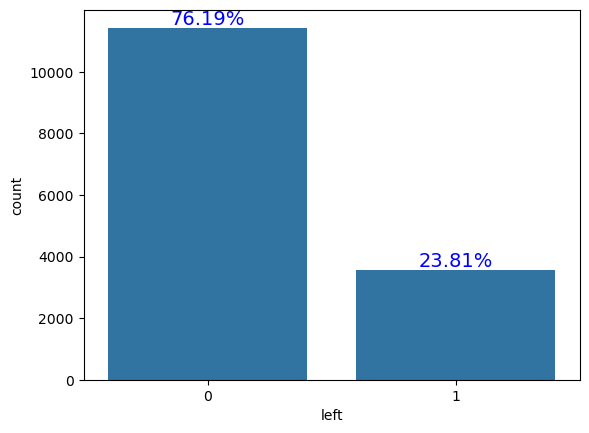

In [98]:
### countplot for left
plt.Figure(figsize= (8,5))
sns.countplot(data = df , x = "left" );
### showing the percenatge
for i in range(left_values.shape[0]):
    count = left_values[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

In [99]:
Work_accident_values = df["Work_accident"].value_counts()
Work_accident_values

Work_accident
0    12830
1     2169
Name: count, dtype: int64

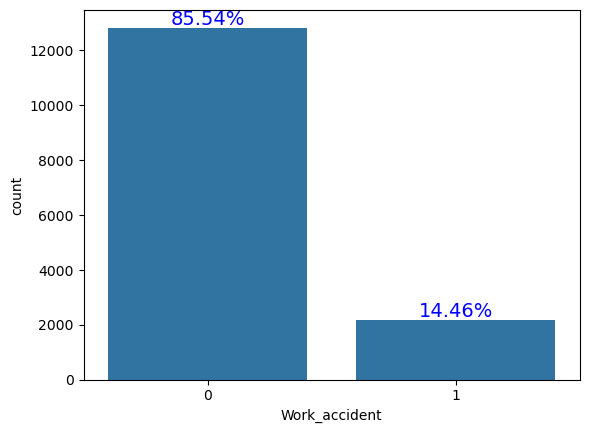

In [100]:
### countplot for Work_accident
plt.Figure(figsize= (8,5))
sns.countplot(data = df , x = "Work_accident" );
### showing the percenatge
for i in range(Work_accident_values.shape[0]):
    count = Work_accident_values[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

In [101]:
salary_values = df["salary"].value_counts()
salary_values

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

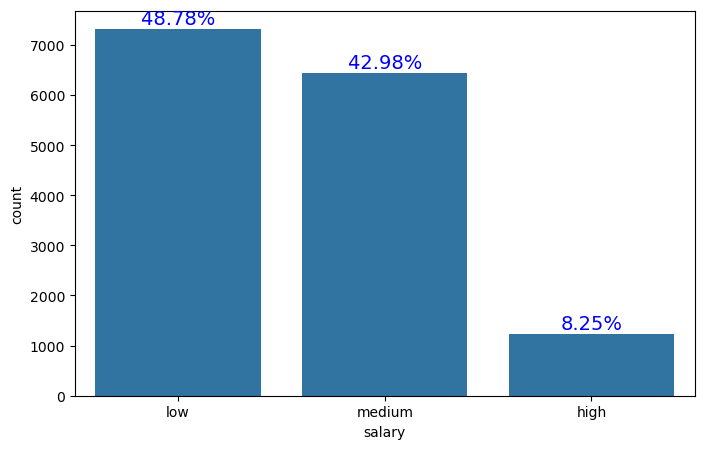

In [102]:
plt.figure(figsize=(8,5))
sns.countplot(x="salary" ,data =df )
for i in range(salary_values.shape[0]):
    count = salary_values.iloc[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

In [103]:
promotion_last_5years_values = df["promotion_last_5years"].value_counts()
promotion_last_5years_values

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

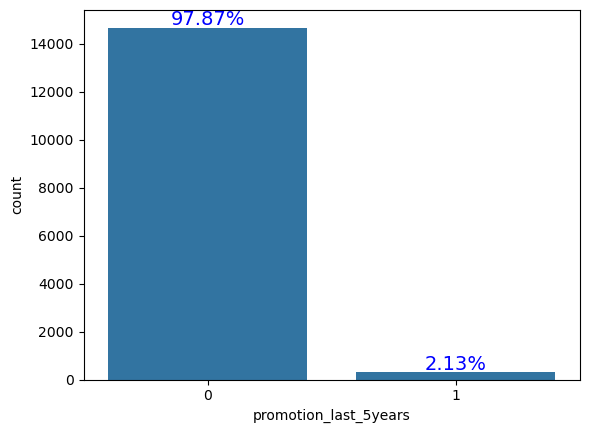

In [104]:
sns.countplot(x = "promotion_last_5years" , data = df)
for i in range(promotion_last_5years_values.shape[0]):
    count = promotion_last_5years_values[i]
    strt='{:0.2f}%'.format(100*count / df.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)

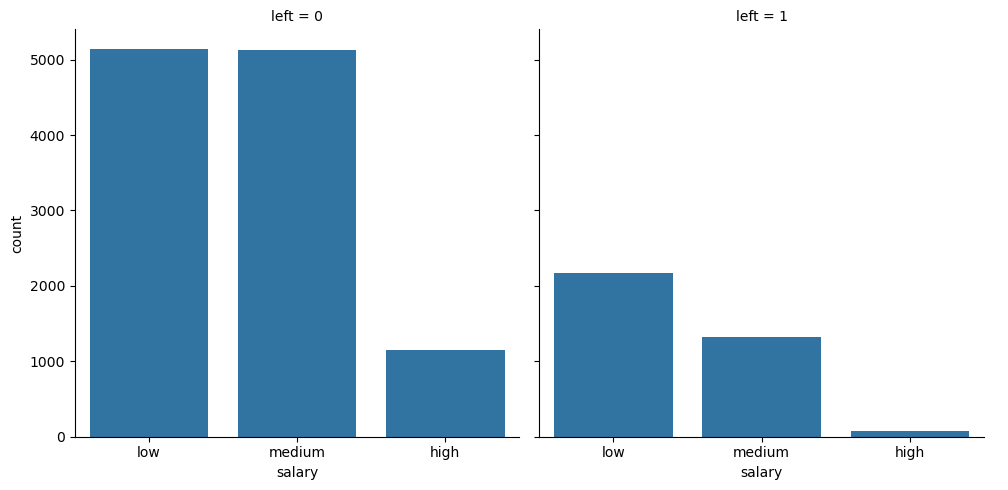

In [105]:
sns.catplot(data = df , x = "salary", kind = 'count', col = "left");

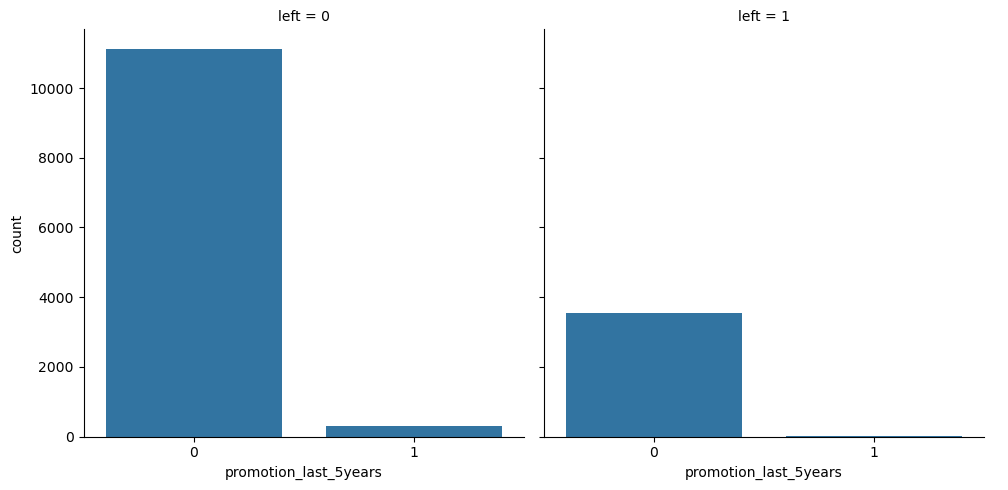

In [106]:
sns.catplot(data = df , x = "promotion_last_5years", kind = 'count', col = "left");

array([[<Axes: title={'center': 'empid'}>,
        <Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'number_project'}>,
        <Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>],
       [<Axes: title={'center': 'Work_accident'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'left'}>]], dtype=object)

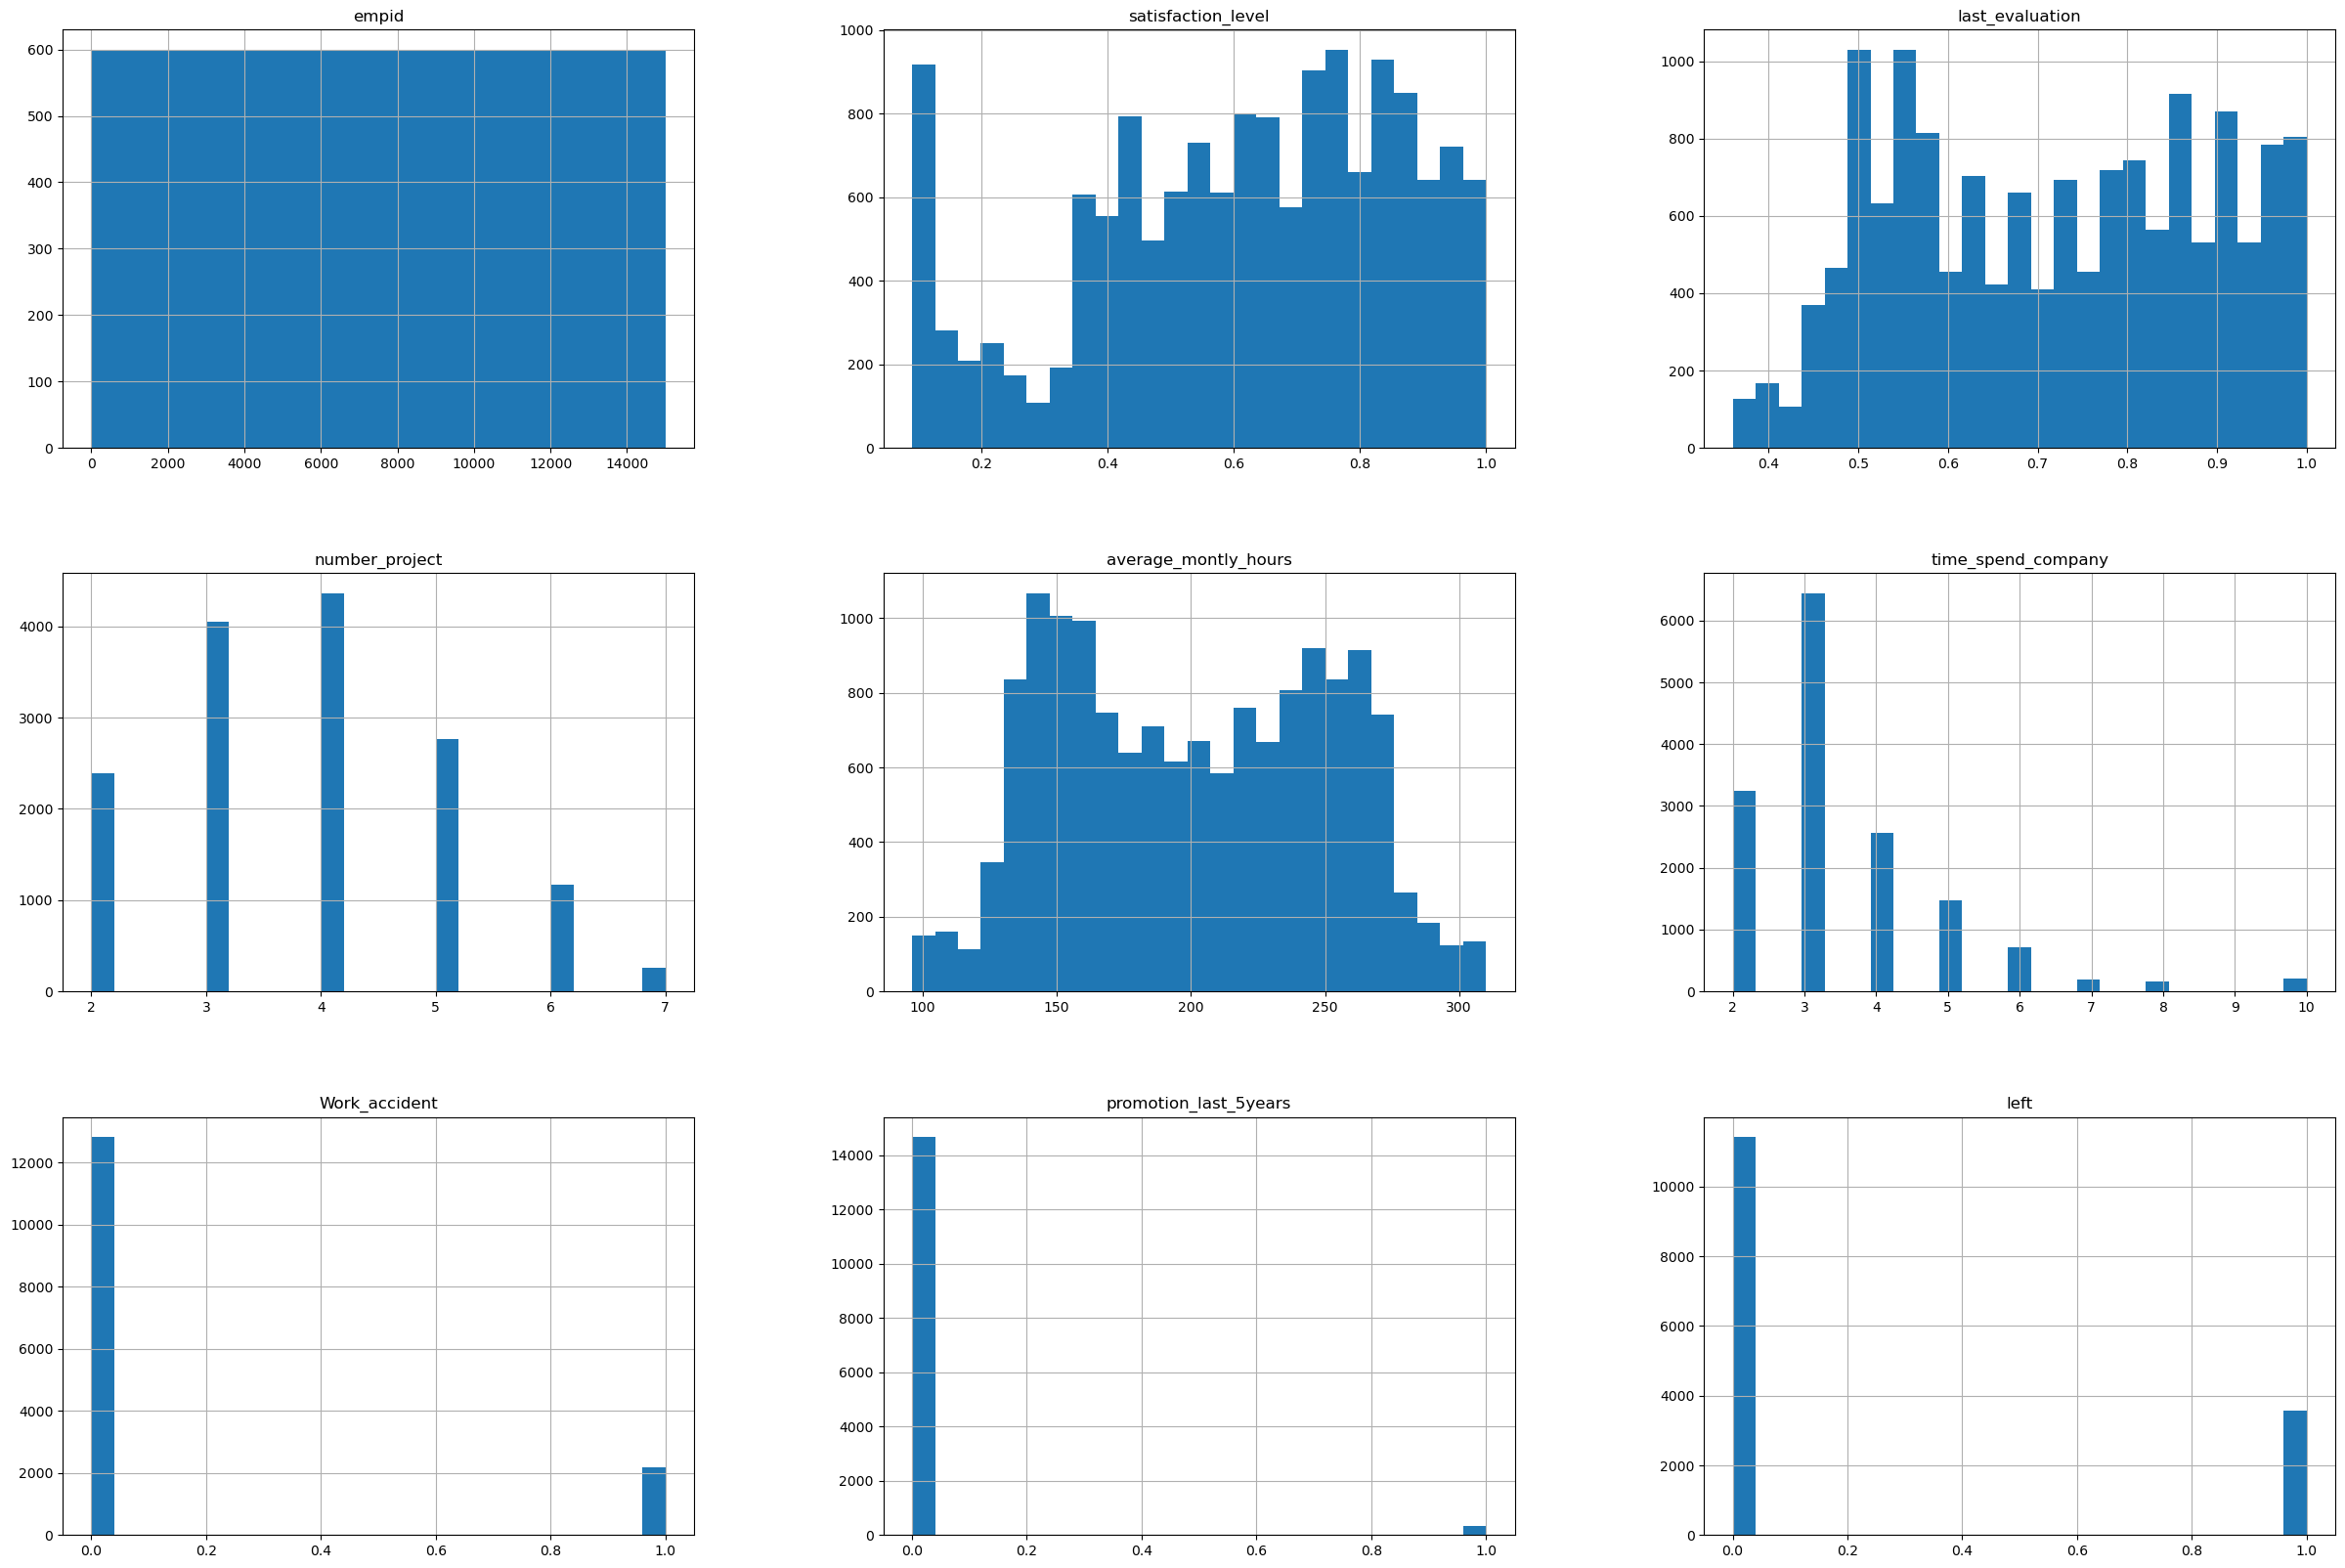

In [107]:
df.hist(bins=25,figsize=(30,20))

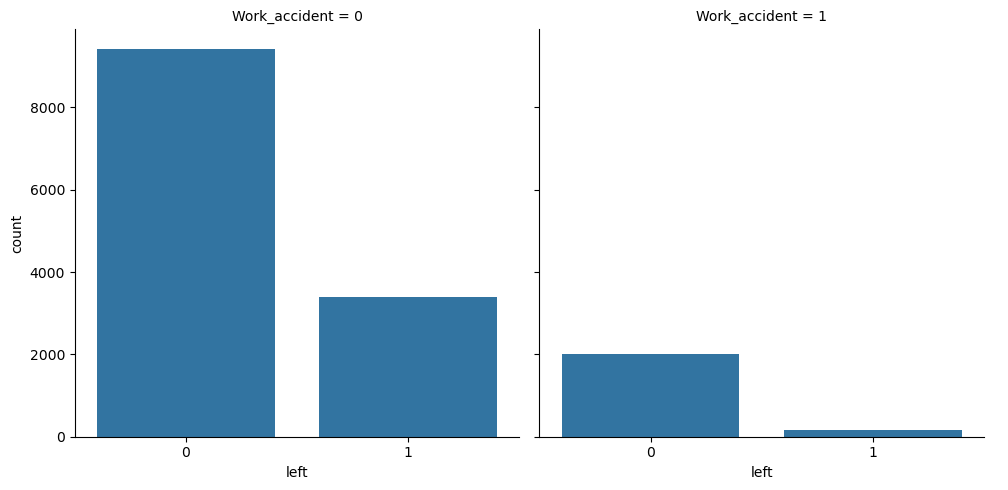

In [108]:
sns.catplot(data = df , x = 'left', kind = 'count', col = 'Work_accident');

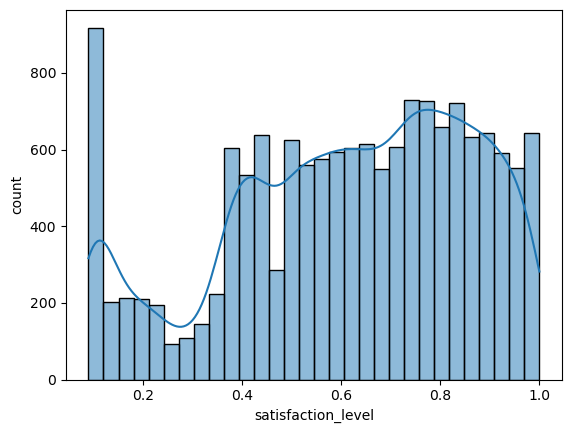

In [109]:
sns.histplot( df['satisfaction_level'] ,kde = True)
plt.xlabel('satisfaction_level')
plt.ylabel('count')
plt.show()

<Axes: xlabel='time_spend_company', ylabel='count'>

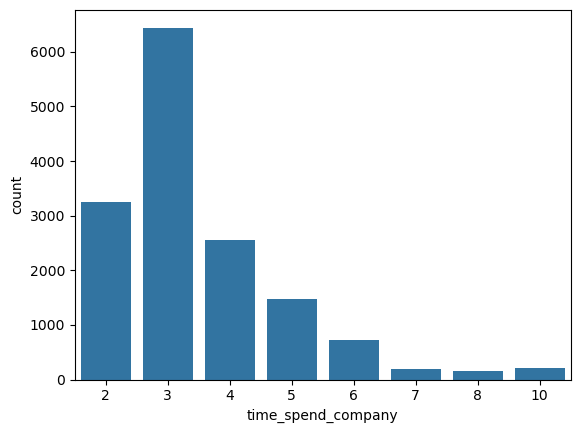

In [110]:
sns.countplot(x = df['time_spend_company'])

<Axes: >

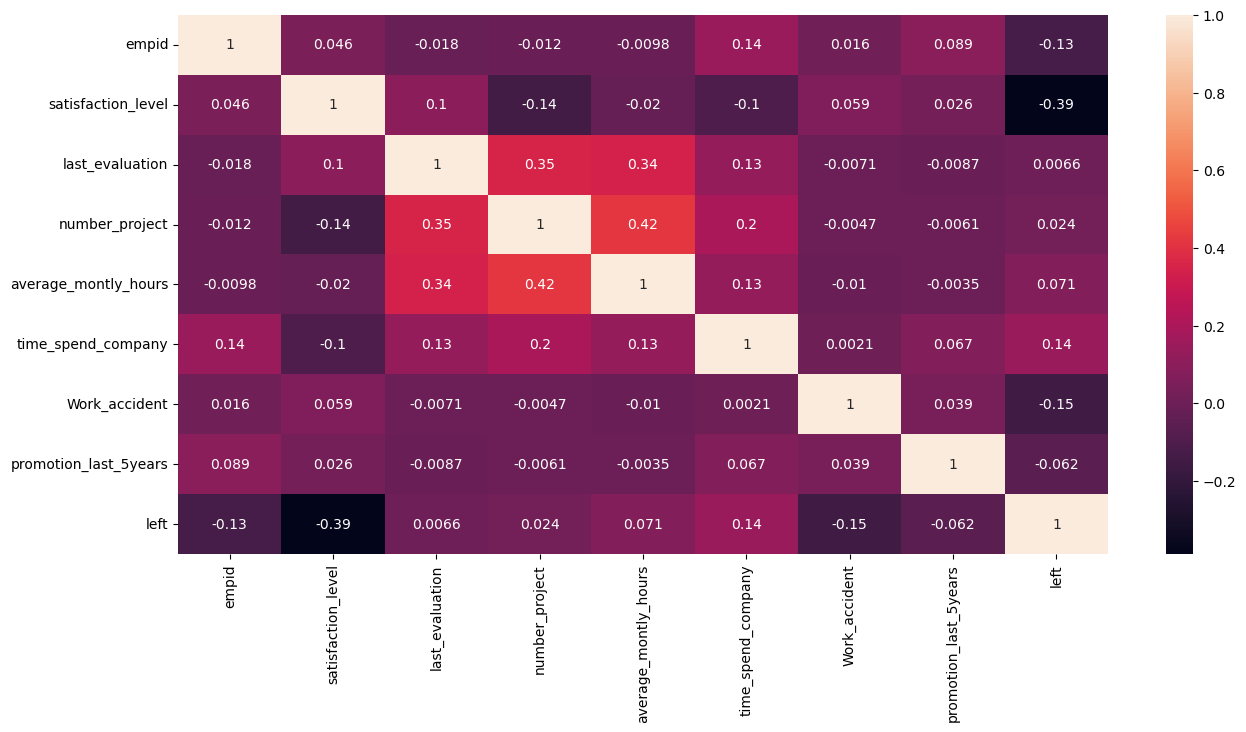

In [111]:
## Checking for correlation
plt.figure(figsize=(15,7))
sns.heatmap(data = df.corr(numeric_only = True),annot=True)

Feature Engineering

In [113]:
df

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [114]:
df['number_project_per_time_spend_company']=df["number_project"]/df["time_spend_company"]
df["satisfaction_level_per_last_evaluation"]=df["satisfaction_level"]/df["last_evaluation"]
df["satisfaction_level_per_number_project"]=df["satisfaction_level"]/df["number_project"]


In [115]:
df.corr(numeric_only = True)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,number_project_per_time_spend_company,satisfaction_level_per_last_evaluation,satisfaction_level_per_number_project
empid,1.000000,0.045650,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994,-0.129047,-0.056270,0.050021,0.031778
satisfaction_level,0.045650,1.000000,0.104903,-0.143168,-0.020176,-0.100912,0.058653,0.025589,-0.388269,0.083970,0.808003,0.740068
last_evaluation,-0.018168,0.104903,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.147747,-0.451865,-0.113867
number_project,-0.012124,-0.143168,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.552551,-0.254268,-0.682786
average_montly_hours,-0.009850,-0.020176,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.181781,-0.157160,-0.209969
time_spend_company,0.144159,-0.100912,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,-0.582233,-0.144051,-0.178025
Work_accident,0.015931,0.058653,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.026786,0.059709,0.033928
promotion_last_5years,0.088994,0.025589,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,-0.027752,0.028175,0.015365
left,-0.129047,-0.388269,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.253657,-0.351698,-0.219171
number_project_per_time_spend_company,-0.056270,0.083970,0.147747,0.552551,0.181781,-0.582233,0.026786,-0.027752,-0.253657,1.000000,0.021101,-0.300399


<Axes: >

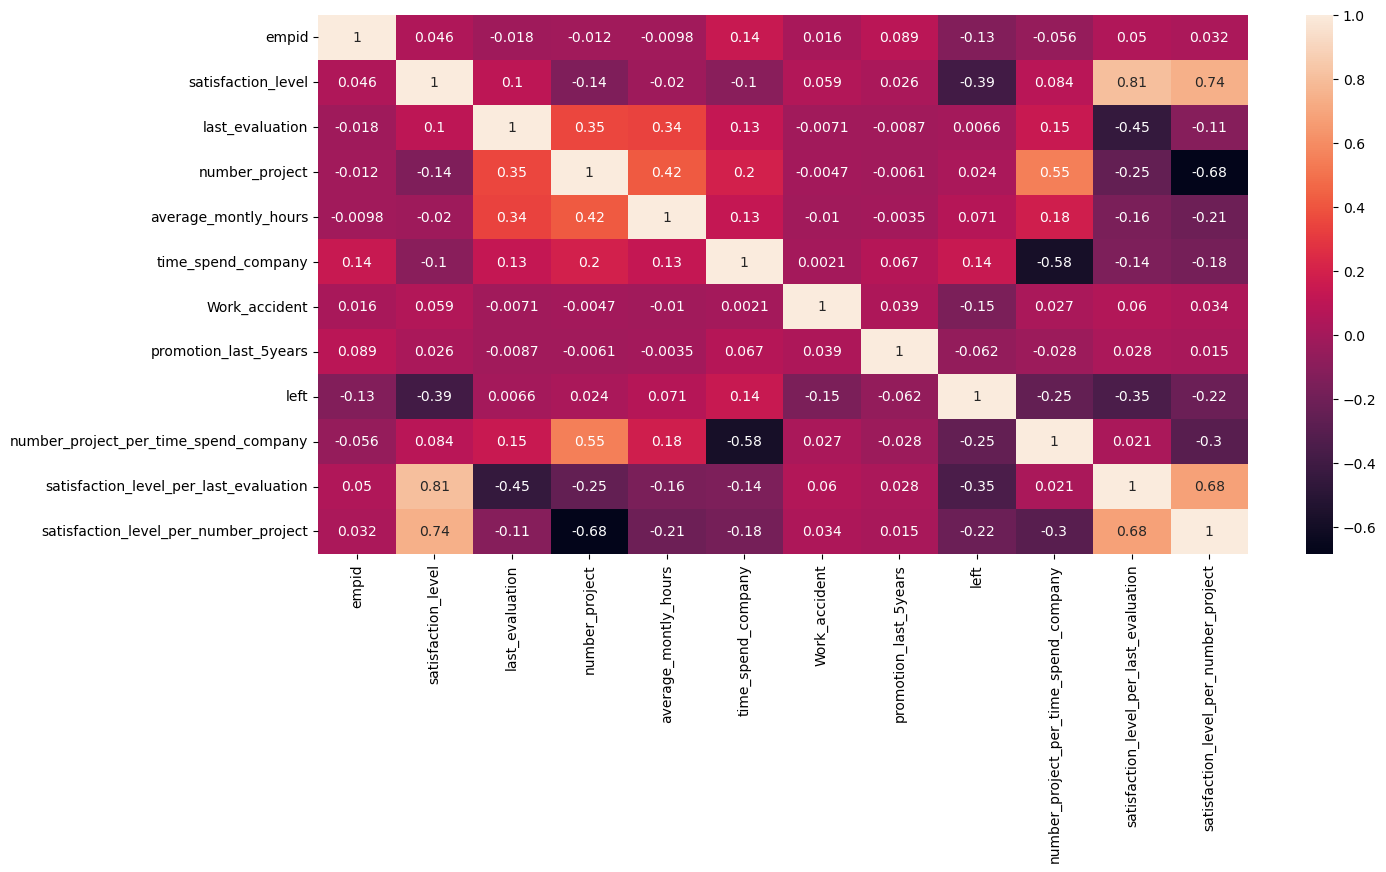

In [116]:
## Checking for correlation
plt.figure(figsize=(15,7))
sns.heatmap(data = df.corr(numeric_only = True),annot=True)

In [117]:
lbl_encoder = LabelEncoder()    
df.iloc[:,8] = lbl_encoder.fit_transform(df.iloc[:,8])
df

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,number_project_per_time_spend_company,satisfaction_level_per_last_evaluation,satisfaction_level_per_number_project
0,1,0.38,0.53,2,157,3,0,0,1,1,0.666667,0.716981,0.190000
1,2,0.80,0.86,5,262,6,0,0,2,1,0.833333,0.930233,0.160000
2,3,0.11,0.88,7,272,4,0,0,2,1,1.750000,0.125000,0.015714
3,4,0.72,0.87,5,223,5,0,0,1,1,1.000000,0.827586,0.144000
4,5,0.37,0.52,2,159,3,0,0,1,1,0.666667,0.711538,0.185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,1,1,0.666667,0.701754,0.200000
14995,14996,0.37,0.48,2,160,3,0,0,1,1,0.666667,0.770833,0.185000
14996,14997,0.37,0.53,2,143,3,0,0,1,1,0.666667,0.698113,0.185000
14997,14998,0.11,0.96,6,280,4,0,0,1,1,1.500000,0.114583,0.018333


In [119]:
X = df.drop(columns=['left','empid'], axis=1)  ## features
y = df['left']  ## target

In [120]:
X_train , X_test,y_train , y_test = train_test_split(X , y, test_size=0.3,random_state=123,shuffle=True)
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (10499, 11)
y_train shape --  (10499,)
X_test shape --  (4500, 11)
y_test shape --  (4500,)


In [154]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns 
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns 
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'number_project_per_time_spend_company', 'satisfaction_level_per_last_evaluation', 'satisfaction_level_per_number_project']
************************************************************
Categorical Columns : 
 ['salary']


In [164]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])


X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                

In [166]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',   
                            learning_rate=0.01,           
                            n_estimators=500,             
                           )
xgb_clf.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [168]:
acc_scores_xgboost = cross_val_score(estimator=xgb_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
acc_scores_xgboost.mean()

0.9800936046643527

In [169]:
y_pred_xgb = cross_val_predict(estimator=xgb_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')
accuracy_score(y_train,y_pred_xgb)

0.9800933422230689

In [174]:
y_pred = xgb_clf.predict(X_test_final)
accuracy_score(y_test,y_pred)

0.98

In [ ]:
joblib.dump(xgb_clf,"XGBOOST.pkl")